# Advanced Prophet Usage
You can scan through [fbprophet docs](https://facebook.github.io/prophet/docs/quick_start.html) and find many options how to tweak your model. 
Some of that functionality is moved to initialization stage to be compatible with Sklearn API. We will showcase the parts that were moved to initialization, but you can also look for other model parameters that could help fine-tuning your model

In [1]:
from hcrystalball.wrappers import ProphetWrapper

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
from hcrystalball.utils import generate_tsdata
X, y = generate_tsdata(n_dates=365*2)

In [4]:
ProphetWrapper?

Init signature:
ProphetWrapper(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
    name='prophet',
    conf_int=False,
    full_prophet_output=False,
    extra_seasonalities=None,
    extra_regressors=None,
    extra_holidays=None,
    fit_params=None,
    clip_predictions_lower=None,
    clip_predictions_upper=None,
)
Docstring:     
Wrapper for fbprophet.Prophet model

https://facebook.github.io/prophet/docs/quick_start.html#python-api

Bring fbprophet to sklearn time-series compatible interface and puts fit parameters
to initialization stage.

Parameters
----------
name : str
    Name of the model insta

## Advanced Holidays
For holidays, we are able to define instead of single boolean attribute distribution around given day. We define `lower_window`, `upper_window` and `prior_scales`

In [5]:
extra_holidays = {
    'Whit Monday':{'lower_window': 2, 'upper_window':2, 'prior_scale': 10},
    'Good Friday':{'lower_window': 1, 'upper_window':1, 'prior_scale': 30}
}

## Unusual Seasonalities

In [6]:
extra_seasonalities = [
    {
        'name':'bi-weekly',
        'period': 14.,
        'fourier_order': 5,
        'prior_scale': 15.0,
        'mode': None
    },
    {
        'name':'bi-yearly',
        'period': 365*2.,
        'fourier_order': 5, 
        'prior_scale': 5.0,
        'mode': None
    },
]

## Exogenous Variables

In [7]:
extra_regressors = ['trend_line']
X['trend_line'] = np.arange(len(X))

In [8]:
prophet = ProphetWrapper(
    extra_holidays=extra_holidays,
    extra_seasonalities=extra_seasonalities,
    extra_regressors=extra_regressors,
    name='prophet_extra',
)

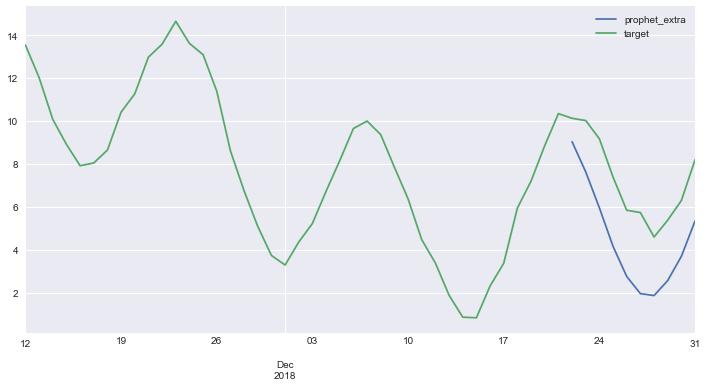

In [9]:
(prophet.fit(X[:-10], y[:-10])
        .predict(X[-10:])
        .merge(y, left_index=True, right_index=True, how='outer')
        .tail(50)
        .plot()
);

Compared to non-tweaked model, this shows our fine-tuning helped to increase performance significantly

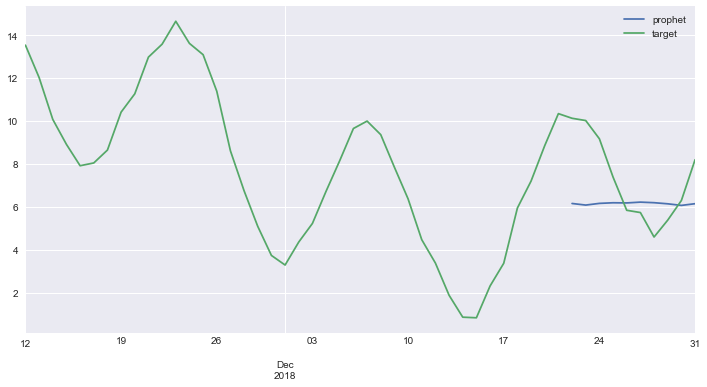

In [10]:
(ProphetWrapper().fit(X[:-10], y[:-10])
                 .predict(X[-10:])
                 .merge(y, left_index=True, right_index=True, how='outer')
                 .tail(50)
                 .plot()
);

## Full Prophet Output
If you need, you can also pass `full_prophet_output` and get rich predict output

In [11]:
(ProphetWrapper(full_prophet_output=True, conf_int=True)
     .fit(X[:-10], y[:-10])
     .predict(X[-10:])
)

,trend,prophet_lower,prophet_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,prophet
2018-12-22,6.184323,0.940298,11.284113,6.184323,6.184323,-0.019427,-0.019427,-0.019427,-0.019427,-0.019427,-0.019427,0.0,0.0,0.0,6.164896
2018-12-23,6.182180,1.150368,11.390180,6.182180,6.182180,-0.091169,-0.091169,-0.091169,-0.091169,-0.091169,-0.091169,0.0,0.0,0.0,6.091011
2018-12-24,6.180037,0.787339,11.328600,6.180037,6.180037,-0.010261,-0.010261,-0.010261,-0.010261,-0.010261,-0.010261,0.0,0.0,0.0,6.169776
2018-12-25,6.177894,0.556975,11.361476,6.177894,6.177894,0.020382,0.020382,0.020382,0.020382,0.020382,0.020382,0.0,0.0,0.0,6.198277
2018-12-26,6.175752,1.031746,11.077620,6.175752,6.175752,0.015292,0.015292,0.015292,0.015292,0.015292,0.015292,0.0,0.0,0.0,6.191044
2018-12-27,6.173609,1.011388,11.724293,6.173609,6.173621,0.054739,0.054739,0.054739,0.054739,0.054739,0.054739,0.0,0.0,0.0,6.228348
2018-12-28,6.171466,1.030493,11.290906,6.171466,6.171515,0.030444,0.030444,0.030444,0.030444,0.030444,0.030444,0.0,0.0,0.0,6.201909
2018-12-29,6.169323,1.187374,11.720556,6.169308,6.169430,-0.019427,-0.019427,-0.019427,-0.019427,-0.019427,-0.019427,0.0,0.0,0.0,6.149896
2018-12-30,6.167180,0.381503,11.488146,6.167136,6.167376,-0.091169,-0.091169,-0.091169,-0.091169,-0.091169,-0.091169,0.0,0.0,0.0,6.076011
2018-12-31,6.165037,0.871889,11.621956,6.164944,6.165293,-0.010261,-0.010261,-0.010261,-0.010261,-0.010261,-0.010261,0.0,0.0,0.0,6.154776
